In [2]:
import pandas as pd # Nos permite manejar data como dataframes
import numpy as np # Numpy es una librería de programación numérica super rápida
import matplotlib.pyplot as plt #sets up plotting under plt
SL = pd.read_csv('synergy_logistics_database.csv')
SL

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...,...
19051,19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000


In [3]:
cyw1= ['register_id','transport_mode', 'total_value']
group1 = SL[cyw1].groupby( by= ['transport_mode'])
group1[cyw1]

In [4]:
group_via= group1['transport_mode'].count()
group_via

transport_mode
Air      2389
Rail     3381
Road     2598
Sea     10688
Name: transport_mode, dtype: int64

In [5]:
cyw2= ['register_id','transport_mode', 'total_value']
group1 = SL[cyw1].groupby( by= [ 'transport_mode'])
group1[cyw1]

In [6]:
group_via1= group1['total_value'].sum()
group_via1

transport_mode
Air      38262147000
Rail     43628043000
Road     33270486000
Sea     100530622000
Name: total_value, dtype: int64

In [7]:
via= []
via_demand = []
via_rev = []
for index, value in group_via.items():
    for ind, val in group_via1.items():
        if index == ind:
            print(f"Via: {index}, Revenue: $ {val}, Demand: {value} ")
            via.append(index)
            via_demand.append(value)
            via_rev.append(val)

Via: Air, Revenue: $ 38262147000, Demand: 2389 
Via: Rail, Revenue: $ 43628043000, Demand: 3381 
Via: Road, Revenue: $ 33270486000, Demand: 2598 
Via: Sea, Revenue: $ 100530622000, Demand: 10688 


In [23]:
df2 = pd.DataFrame(list(zip( via,via_rev,via_demand)), 
               columns =['Via', 'Total_Revenue', 'Demand' ]) 
Sort_Via =df2.sort_values(by='Total_Revenue', ascending=False)
Sort_Via

,Via,Total_Revenue,Demand
3,Sea,100530622000,10688
1,Rail,43628043000,3381
0,Air,38262147000,2389
2,Road,33270486000,2598


In [24]:
df2 = pd.DataFrame(list(zip( via,via_rev,via_demand)), 
               columns =['Via', 'Total_Revenue', 'Demand' ]) 
Sort_Via_dem =df2.sort_values(by='Demand', ascending=False)
Sort_Via_dem

,Via,Total_Revenue,Demand
3,Sea,100530622000,10688
1,Rail,43628043000,3381
2,Road,33270486000,2598
0,Air,38262147000,2389


In [29]:
total_rev = SL['total_value'].sum()
total_rev
Per_rev = df2['Total_Revenue']/total_rev * 100
Per_rev
per_list=[]
for i, v in Per_rev.items():
    per_list.append(v)

In [30]:
total_dem = SL['total_value'].count()
total_dem
Per_dem = df2['Demand']/total_dem * 100
Per_dem
per_list_dem=[]
for i, v in Per_dem.items():
    per_list_dem.append(v)

In [31]:
df3 = pd.DataFrame(list(zip( via,via_rev,via_demand, per_list, per_list_dem)), 
               columns =['Via', 'Total_Revenue', 'Demand', '%Rev', '%Dem' ]) 
Sort_Via =df3.sort_values(by='Total_Revenue', ascending=False)
Sort_Via

,Via,Total_Revenue,Demand,%Rev,%Dem
3,Sea,100530622000,10688,46.608566,56.087322
1,Rail,43628043000,3381,20.227076,17.742443
0,Air,38262147000,2389,17.739310,12.536734
2,Road,33270486000,2598,15.425048,13.633501


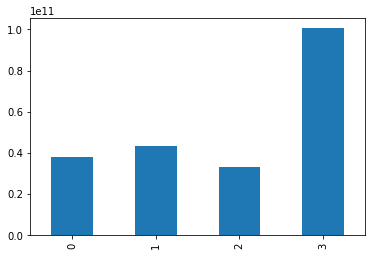

In [45]:
df3['Total_Revenue'].plot.bar();

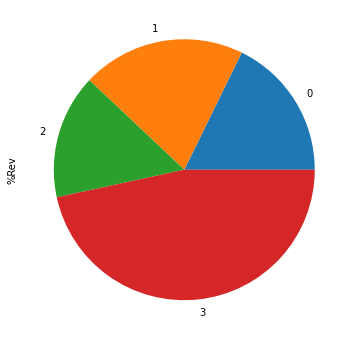

In [48]:
df3['%Rev'].plot.pie(figsize=(6, 6)) 


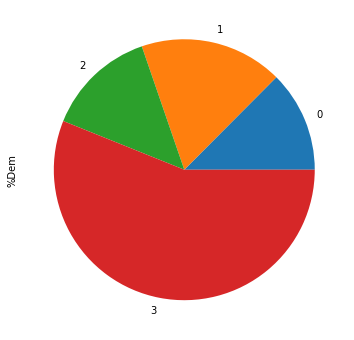

In [47]:
df3['%Dem'].plot.pie(figsize=(6, 6))